In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
# import splitfolders
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import top_k_categorical_accuracy
%matplotlib inline

2022-10-01 22:11:35.320340: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
# !pip3 install -U scikit-learn
# !pip install keras-resnet

In [3]:
# input_folder = '//media/imran/2/Study/Thesis/Dataset/Yoga-82/category/'
# splitfolders.ratio(input_folder, output = "/media/imran/2/Study/Thesis/MobileNet/Category",
#                   seed = 42, ratio = (0.7, 0.2, 0.1),
#                   group_prefix = None)

In [2]:
train_path = '/media/kaizu/2/Study/Thesis/MobileNet/Category/train'
valid_path = '/media/kaizu/2/Study/Thesis/MobileNet/Category/val'
test_path = '/media/kaizu/2/Study/Thesis/MobileNet/Category/test'

In [3]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.xception.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.xception.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.xception.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224, 224), batch_size=10, shuffle=False)
           

Found 12884 images belonging to 6 classes.
Found 3666 images belonging to 6 classes.
Found 1922 images belonging to 6 classes.


In [4]:
mobile = keras.applications.Xception(
    include_top=False)

2022-10-01 22:12:29.569797: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-10-01 22:12:29.571160: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-10-01 22:12:29.618094: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-01 22:12:29.618488: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:06:00.0 name: NVIDIA GeForce GTX 1050 Ti computeCapability: 6.1
coreClock: 1.4425GHz coreCount: 6 deviceMemorySize: 3.94GiB deviceMemoryBandwidth: 104.43GiB/s
2022-10-01 22:12:29.618531: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-10-01 22:12:29.988015: I tensorflow/stream_executor/platform

In [5]:
mobile.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [9]:
mobile.input

<KerasTensor: shape=(None, None, None, 3) dtype=float32 (created by layer 'input_1')>

In [6]:
mobile.trainable = False

In [7]:
x = mobile(inputs = mobile.input, training=False)

In [8]:
x = keras.layers.GlobalAveragePooling2D()(x)

In [9]:
# x = keras.layers.GlobalAveragePooling2D()(x)

In [10]:
# x = mobile.layers[-2].output
output = Dense(units=6, activation='softmax')(x)

In [11]:
model = Model(inputs=mobile.input, outputs=output)

In [16]:
# for layer in model.layers[:-17]:
#     layer.trainable = False

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
xception (Functional)        (None, None, None, 2048)  20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 12294     
Total params: 20,873,774
Trainable params: 12,294
Non-trainable params: 20,861,480
_________________________________________________________________


In [13]:
# params = count_params (model)
# assert params['non_trainable_params'] == 1365184
# assert params['trainable_params'] == 1873930

In [14]:
# from keras.metrics import top_k_categorical_accuracy
# def top_2_categorical_accuray(y_true, y_pred):
#     return top_k_categorical_accuracy(y_true, y_pred,k=2)

# def top_3_categorical_accuray(y_true, y_pred):
#     return top_k_categorical_accuracy(y_true, y_pred,k=3)

In [15]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top_5', dtype=None), tf.keras.metrics.TopKCategoricalAccuracy(k=10, name='top_10', dtype=None)])

In [16]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [17]:
history = model.fit(x=train_batches, validation_data=valid_batches, epochs=20, verbose=1)

2022-10-01 22:13:52.227039: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-10-01 22:13:52.263115: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3193490000 Hz


Epoch 1/20


2022-10-01 22:13:54.594996: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-10-01 22:13:56.995309: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-10-01 22:14:04.077765: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-10-01 22:14:04.129291: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2022-10-01 22:14:10.146711: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.42GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


1288/1289 [============================>.] - ETA: 0s - loss: 1.5758 - accuracy: 0.3749 - top_5: 0.9414 - top_10: 1.0000

2022-10-01 22:19:16.507521: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.41GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


1289/1289 [==============================] - ETA: 0s - loss: 1.5757 - accuracy: 0.3750 - top_5: 0.9414 - top_10: 1.0000

2022-10-01 22:20:36.441022: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.41GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


1289/1289 [==============================] - 405s 300ms/step - loss: 1.5756 - accuracy: 0.3750 - top_5: 0.9414 - top_10: 1.0000 - val_loss: 1.2734 - val_accuracy: 0.5265 - val_top_5: 0.9768 - val_top_10: 1.0000
Epoch 2/20
1289/1289 [==============================] - 179s 139ms/step - loss: 1.2393 - accuracy: 0.5452 - top_5: 0.9762 - top_10: 1.0000 - val_loss: 1.1747 - val_accuracy: 0.5753 - val_top_5: 0.9823 - val_top_10: 1.0000
Epoch 3/20
1289/1289 [==============================] - 181s 140ms/step - loss: 1.1240 - accuracy: 0.5967 - top_5: 0.9839 - top_10: 1.0000 - val_loss: 1.1080 - val_accuracy: 0.5974 - val_top_5: 0.9825 - val_top_10: 1.0000
Epoch 4/20
1289/1289 [==============================] - 181s 141ms/step - loss: 1.0654 - accuracy: 0.6195 - top_5: 0.9875 - top_10: 1.0000 - val_loss: 1.0696 - val_accuracy: 0.6056 - val_top_5: 0.9855 - val_top_10: 1.0000
Epoch 5/20
1289/1289 [==============================] - 180s 139ms/step - loss: 1.0195 - accuracy: 0.6294 - top_5: 0.9880 -

In [18]:
mobile.trainable = True

In [19]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top_5', dtype=None), tf.keras.metrics.TopKCategoricalAccuracy(k=10, name='top_10', dtype=None)])

In [20]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [21]:
history1 = model.fit(x=train_batches, validation_data=valid_batches, epochs=20, verbose=1)

Epoch 1/20


2022-10-01 23:22:17.784142: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.39GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-10-01 23:22:18.111592: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.43GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-10-01 23:22:19.082782: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.62GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-10-01 23:22:19.411011: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Alloc

1289/1289 [==============================] - 641s 485ms/step - loss: 0.7125 - accuracy: 0.7490 - top_5: 0.9956 - top_10: 1.0000 - val_loss: 0.3269 - val_accuracy: 0.8841 - val_top_5: 0.9986 - val_top_10: 1.0000
Epoch 2/20
1289/1289 [==============================] - 611s 474ms/step - loss: 0.2373 - accuracy: 0.9159 - top_5: 0.9997 - top_10: 1.0000 - val_loss: 0.3222 - val_accuracy: 0.8933 - val_top_5: 0.9981 - val_top_10: 1.0000
Epoch 3/20
1289/1289 [==============================] - 614s 476ms/step - loss: 0.1455 - accuracy: 0.9451 - top_5: 1.0000 - top_10: 1.0000 - val_loss: 0.2672 - val_accuracy: 0.9182 - val_top_5: 0.9989 - val_top_10: 1.0000
Epoch 4/20
1289/1289 [==============================] - 610s 473ms/step - loss: 0.1152 - accuracy: 0.9545 - top_5: 0.9996 - top_10: 1.0000 - val_loss: 0.3610 - val_accuracy: 0.8827 - val_top_5: 0.9978 - val_top_10: 1.0000
Epoch 5/20
1289/1289 [==============================] - 610s 473ms/step - loss: 0.0988 - accuracy: 0.9609 - top_5: 1.0000 -

In [22]:
test_labels = test_batches.classes

In [23]:
predictions = model.predict(x=test_batches, verbose=1)

193/193 [==============================] - 43s 220ms/step


In [24]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [25]:
test_batches.class_indices

{'Balancing': 0,
 'Inverted': 1,
 'Reclining': 2,
 'Sitting': 3,
 'Standing': 4,
 'Wheel': 5}

In [ ]:
def plot_confusion_matrix(cm, classes,
                         normalize = False,
                         title = 'Confusion matrix',
                         cmap = plt.cm.Blues):
    
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 90)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment = "center",
                color = "white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = ['0','1','2','3','4','5']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [26]:
model.save('/home/kaizu/Downloads/thesis/Finetuned_6_Xception(91%).h5')

In [32]:
x = history.history['val_top_5']
z = history.history['val_top_10']

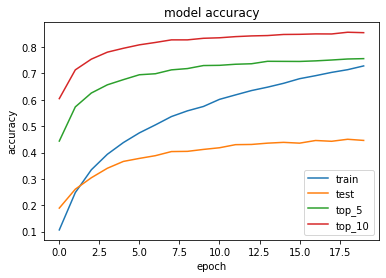

In [33]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(x)
plt.plot(z)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test','top_5','top_10'], loc='lower right')
plt.show()

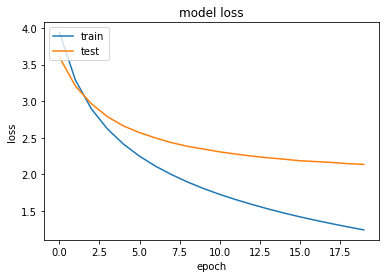

In [34]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()